In [3]:
from __future__ import division
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from typing import List


In [15]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

def predict_outcome_for_digit_dataset(X : np.ndarray, theta : List):
    '''

    :param X: M x N matrix
    :param theta: List[theta_s] where theta_s = M x (number_of_features_in_that_hidden_layer)
    :return: prediction : N x 1 vector with predictions of the output in this case
    '''

    ones = np.ones((1, X.shape[1]))
    X = np.vstack((ones, X))
    assert X.shape[0] == theta[0].shape[0]

    A = sigmoid(theta[0].transpose().dot(X))
    ones = np.ones((1, A.shape[1]))
    A = np.vstack((ones, A))
    assert A.shape[0] == theta[1].shape[0]

    B = sigmoid(theta[1].transpose().dot(A))
    prediction = np.argmax(B, axis = 0) + 1

    return prediction

def get_accuracy(prediction: np.ndarray, y: np.ndarray) -> float:
    '''

    :param prediction: predicted vector from optimization N x 1
    :param y: actual output N x 1
    :return: accuracy float
    '''
    accuracy = len(np.where((prediction == y))[0]) / len(y) * 100.0
    return accuracy
    
def display_data(X : np.ndarray, number_of_images_to_plot:int, fig_number:int) -> plt.figure():
    '''
    Reads a NxM matrix, makes a reshaped matrix and plots the individual images on a
    square grid depending on how many images have to be plotted
    :param X: M x N matrix
    :param : number of images to plot
    N : number of training samples
    M : number of parameters
    :return:
    '''

    random_images = np.random.randint(0, X.shape[0], number_of_images_to_plot)
    rows = np.sqrt(number_of_images_to_plot)
    columns = rows

    number_of_pixels = int(np.sqrt(X.shape[1]))

    if number_of_images_to_plot == 1:
        fig = plt.figure(fig_number, figsize=(3, 3))
        X_reshaped = X.reshape((number_of_pixels,number_of_pixels))
        plt.imshow(X_reshaped)

    elif number_of_images_to_plot > 1:
        fig = plt.figure(fig_number, figsize=(rows, columns))
        for index, value in enumerate(random_images):
            X_reshaped = X[value].reshape((number_of_pixels,number_of_pixels))
            fig.add_subplot(rows, columns, index + 1)
            plt.imshow(X_reshaped)

    return fig



<Figure size 432x288 with 0 Axes>

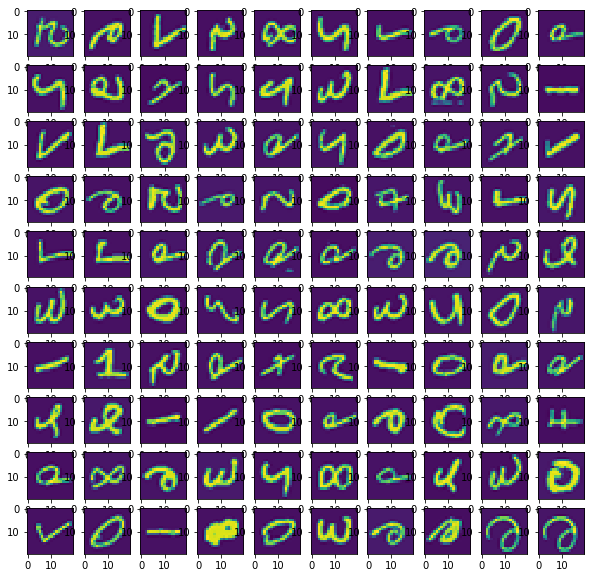

In [6]:
# Load Data
data = scipy.io.loadmat('datasets/ex3data1.mat')

X_training = data['X']
y_training = data['y']

#Plot data
plot_training_data = display_data(X_training, 100)
#plt.show()

In [10]:
# Load weights of neural network
theta = scipy.io.loadmat('datasets/ex3weights.mat')
theta_1 = theta['Theta1']
theta_2 = theta['Theta2']

print(theta_1.shape)
print(theta_2.shape)


(25, 401)
(10, 26)


In [11]:
number_of_hidden_layers = 2
theta = [theta_1.transpose(), theta_2.transpose()]
prediction = predict_outcome_for_digit_dataset(X_training.transpose(), theta)
accuracy = get_accuracy(prediction, y_training.flatten())

print(f'Accuracy of the neural network is : {accuracy}')


Accuracy of the neural network is : 97.52


4093
Predicted digit: [8] and training digit : [8]


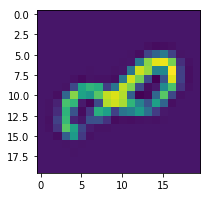

In [31]:
#Predict digit for a random digit image 

random_row = np.random.randint(0, 5000)
print(random_row)


input_image = X_training[random_row :random_row + 1,:]
prediction_digit = predict_outcome_for_digit_dataset(input_image.transpose(), theta)

print(f'Predicted digit: {prediction_digit} and training digit : {y_training[random_row]}')
plot_random_digit = display_data(input_image, 1, fig_number=2)
plt.show()